In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv
/kaggle/input/mental-health/6- depressive-symptoms-across-us-population.csv
/kaggle/input/mental-health/3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv
/kaggle/input/mental-health/5- anxiety-disorders-treatment-gap.csv
/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv
/kaggle/input/mental-health/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv
/kaggle/input/mental-health/2- burden-disease-from-each-mental-illness(1).csv


# Visualization

### Let's check number of checks for every mental disorder

In [6]:
disorder_prevalence_df = pd.read_csv('/kaggle/input/mental-health/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv')

In [7]:
disorder_prevalence_df.describe()

,Code,Year,Number of countries with primary data on prevalence of mental disorders
count,0.0,15.0,15.000000
mean,NaN,2019.0,56.733333
std,NaN,0.0,46.172760
min,NaN,2019.0,2.000000
25%,NaN,2019.0,31.000000
50%,NaN,2019.0,41.000000
75%,NaN,2019.0,63.000000
max,NaN,2019.0,172.000000


In [8]:
disorder_prevalence_df.head(10)

,Entity,Code,Year,Number of countries with primary data on prevalence of mental disorders
0,Alcohol use disorders,NaN,2019,58
1,Amphetamine use disorders,NaN,2019,58
2,Anorexia nervosa,NaN,2019,27
3,Anxiety disorders,NaN,2019,58
4,Attention-deficit hyperactivity disorder,NaN,2019,172
5,Autism spectrum disorders,NaN,2019,34
6,Bipolar disorder,NaN,2019,41
7,Bulimia nervosa,NaN,2019,31
8,Cannabis use disorders,NaN,2019,121
9,Cocaine use disorders,NaN,2019,68


In [10]:
disorder_prevalence_df.rename(columns = {'Number of countries with primary data on prevalence of mental disorders':'Total'}, inplace = True)

In [20]:
disorder_prevalence_df.sort_values(by=['Total'], ascending=False)[:5]

,Entity,Code,Year,Total
4,Attention-deficit hyperactivity disorder,NaN,2019,172
8,Cannabis use disorders,NaN,2019,121
11,Major depressive disorder,NaN,2019,111
9,Cocaine use disorders,NaN,2019,68
0,Alcohol use disorders,NaN,2019,58


So the top 5 are:
* ADHD
* Cannabis
* MDD
* Substance Abuse (Cocaine)
* Alcohol

### Let's see for which of these there are information about Iran.

Later we can look at the relationship of these data.

In [21]:
mental_df = pd.read_csv('/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv')

In [26]:
mental_df.head(10)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


In [23]:
mental_df.describe()

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [48]:
countries = mental_df.Entity.values

In [49]:
np.where(countries == 'Iran')

(array([2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710,
        2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721,
        2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729]),)

In [55]:
print(mental_df.loc[2700:2729]['Year'].min())
print(mental_df.loc[2700:2729]['Year'].max())


1990
2019


In [57]:
# The data is between 2019 and 1990, so 29 years.

iran_s = mental_df[2700:2729]

In [58]:
import matplotlib.pyplot as plt

In [61]:
iran_s

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
2700,Iran,IRN,1990,0.252247,4.661584,7.036182,0.808239,0.202594
2701,Iran,IRN,1991,0.252092,4.625845,7.041212,0.811102,0.203358
2702,Iran,IRN,1992,0.251972,4.593084,7.048177,0.813840,0.204191
2703,Iran,IRN,1993,0.251910,4.562375,7.051029,0.815931,0.204766
2704,Iran,IRN,1994,0.251895,4.537415,7.051289,0.817273,0.205293
2705,Iran,IRN,1995,0.251915,4.523035,7.050717,0.817761,0.205691
2706,Iran,IRN,1996,0.252032,4.511061,7.050144,0.817723,0.205850
2707,Iran,IRN,1997,0.252259,4.495579,7.050258,0.817624,0.206041
2708,Iran,IRN,1998,0.252528,4.480328,7.050633,0.817495,0.206091
2709,Iran,IRN,1999,0.252765,4.468295,7.051286,0.817379,0.206462


In [73]:
# Renaming the disorder for more pandas firendly names
# Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized   -> Schizophrenia
# Depressive disorders (share of population) - Sex: Both - Age: Age-standardized      -> Depressive
# Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized         -> Anxiety
# Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized         -> BPD
# Eating disorders (share of population) - Sex: Both - Age: Age-standardized          -> Eating


mental_df.rename(columns = {'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized':'Schizophrenia'}, inplace = True)
mental_df.rename(columns = {'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized':'Depressive'}, inplace = True)
mental_df.rename(columns = {'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety'}, inplace = True)
mental_df.rename(columns = {'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'BPD'}, inplace = True)
mental_df.rename(columns = {'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating'}, inplace = True)

In [74]:
iran_s

,Entity,Code,Year,Schizophrenia,Depressive,Anxiety,BPD,Eating
2700,Iran,IRN,1990,0.252247,4.661584,7.036182,0.808239,0.202594
2701,Iran,IRN,1991,0.252092,4.625845,7.041212,0.811102,0.203358
2702,Iran,IRN,1992,0.251972,4.593084,7.048177,0.813840,0.204191
2703,Iran,IRN,1993,0.251910,4.562375,7.051029,0.815931,0.204766
2704,Iran,IRN,1994,0.251895,4.537415,7.051289,0.817273,0.205293
2705,Iran,IRN,1995,0.251915,4.523035,7.050717,0.817761,0.205691
2706,Iran,IRN,1996,0.252032,4.511061,7.050144,0.817723,0.205850
2707,Iran,IRN,1997,0.252259,4.495579,7.050258,0.817624,0.206041
2708,Iran,IRN,1998,0.252528,4.480328,7.050633,0.817495,0.206091
2709,Iran,IRN,1999,0.252765,4.468295,7.051286,0.817379,0.206462


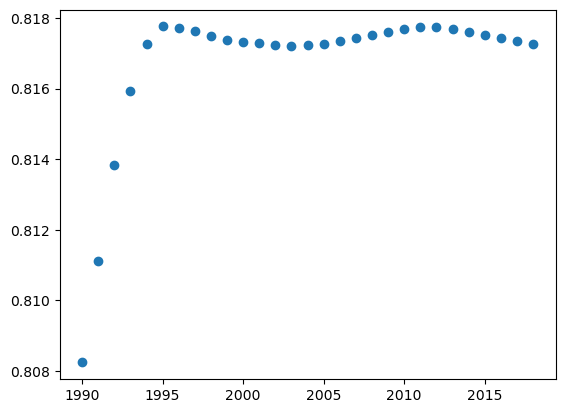

In [78]:
plt.scatter(np.arange(1990, 2019), iran_s['BPD'])